In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(619040, 7)
              date     open      high       low     close   volume Name
561181  2018-01-19  118.040  120.2000  116.9000  118.0900  1839851  UHS
70199   2017-06-30  200.090  204.9500  199.3700  203.2800  1067641  AYI
197134  2013-12-16   79.670   80.9850   79.6700   79.8700  4120576  EOG
77352   2015-11-25   38.530   38.6669   38.3000   38.4800  2752328  BBT
385340  2013-10-23   36.290   36.5400   36.0900   36.3800  6803078   MO
265444  2014-05-07   20.605   20.6125   20.1275   20.3375  3504260  HBI
505890  2013-10-31  111.270  111.6100  110.6300  111.2100   460405  SJM


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


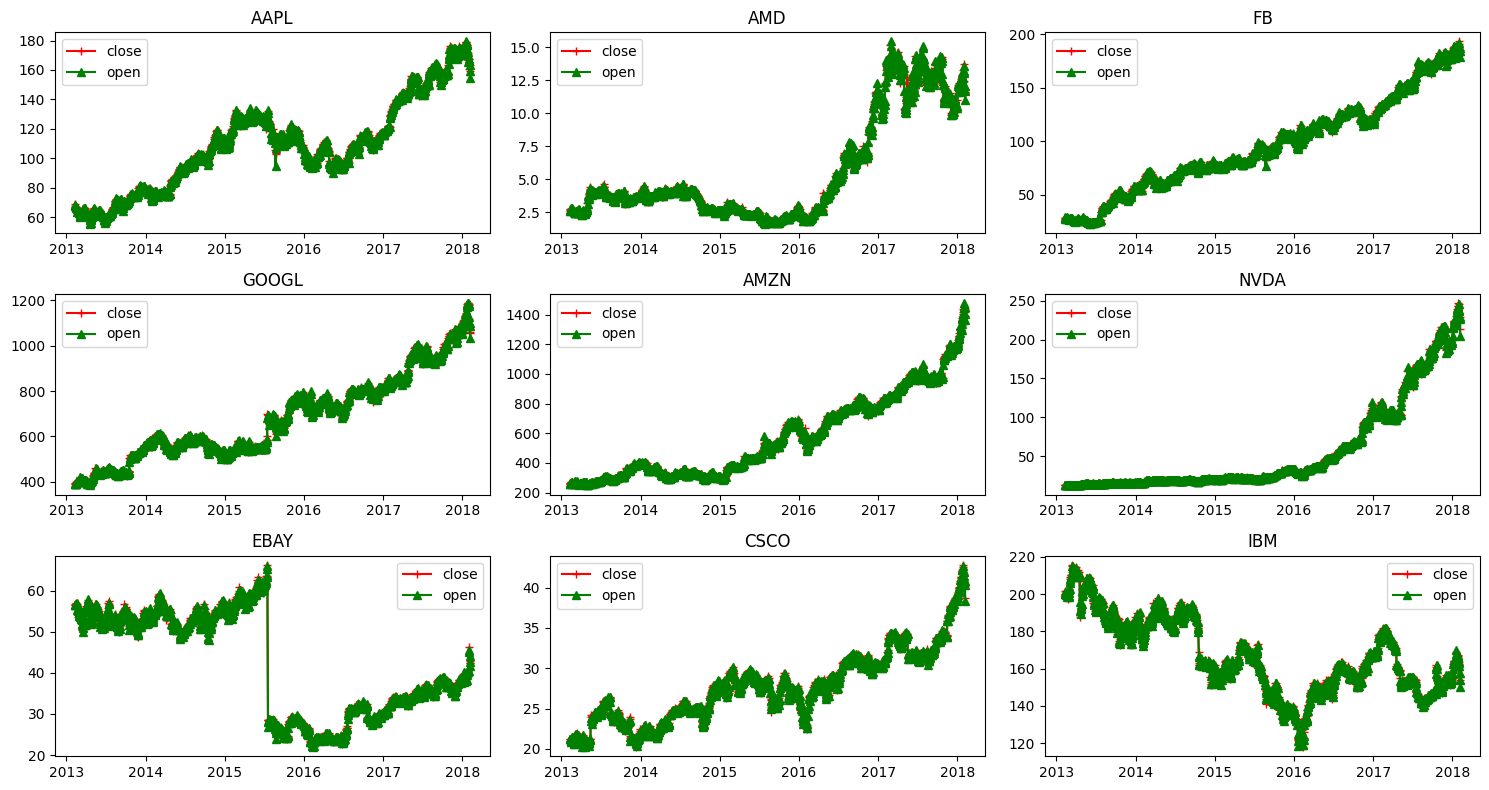

In [ ]:
data['date'] = pd.to_datetime(data['date'])
# date vs open
# date vs close

# Define the list of companies you want to plot
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
	plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
	plt.title(company)
	plt.legend()
	plt.tight_layout()

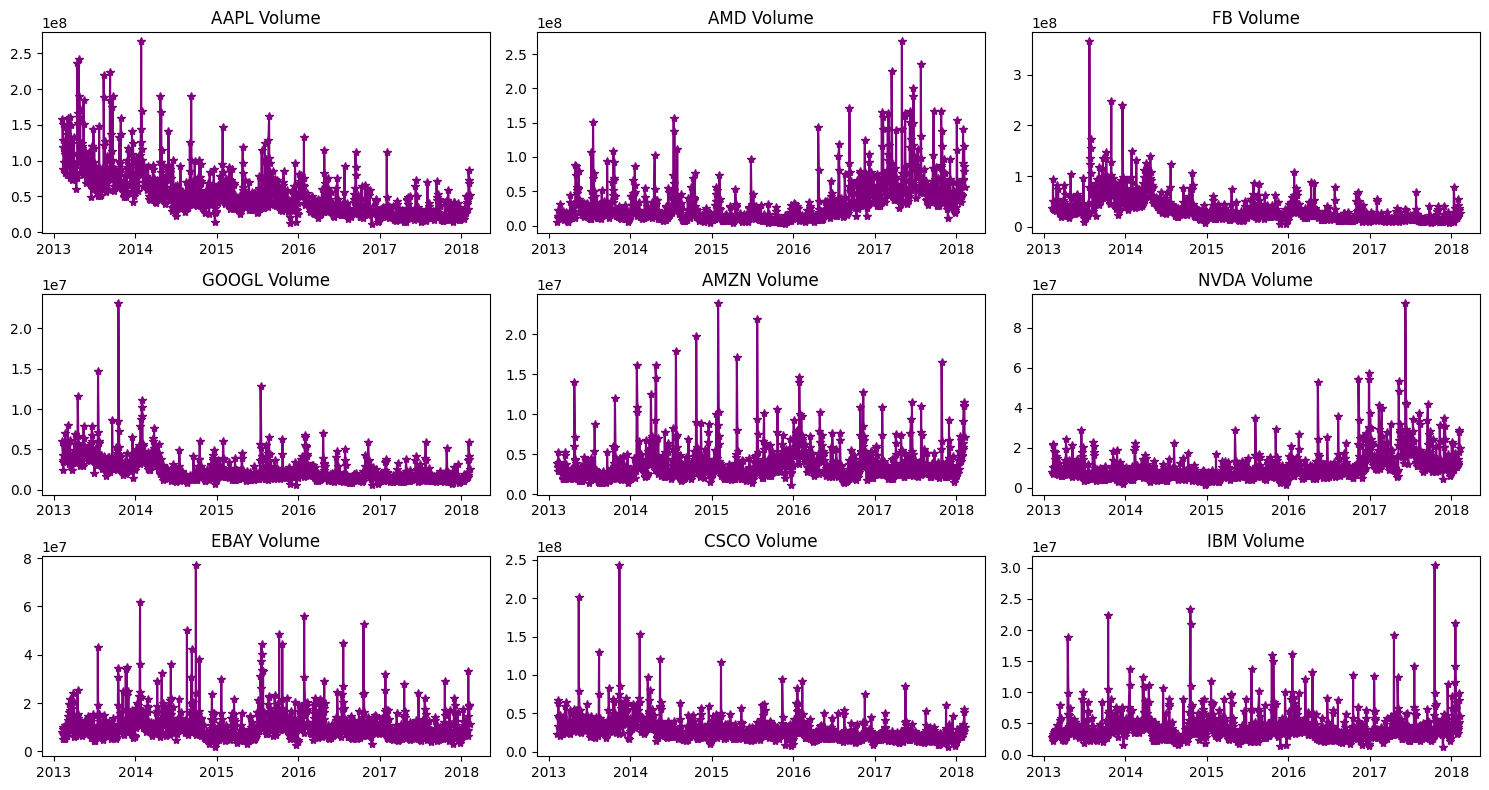

In [ ]:
plt.figure(figsize=(15, 8))
for index, company in enumerate(companies, 1):
	plt.subplot(3, 3, index)
	c = data[data['Name'] == company]
	plt.plot(c['date'], c['volume'], c='purple', marker='*')
	plt.title(f"{company} Volume")
	plt.tight_layout()

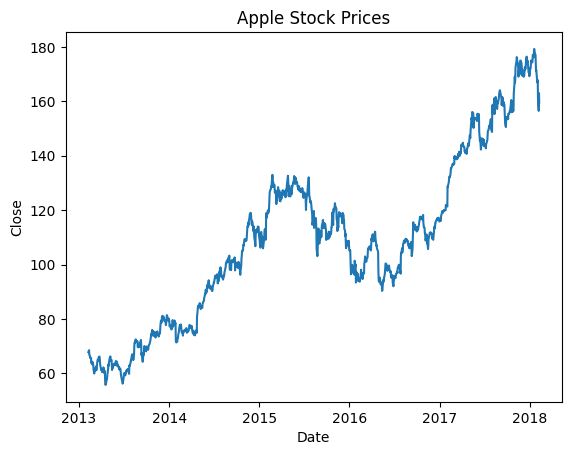

In [ ]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [ ]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [ ]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0657
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0130
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0080
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0077
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0083
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0078
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0072
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0067
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0064
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0064


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step
MSE 34.42497277619552
RMSE 5.867279844714714


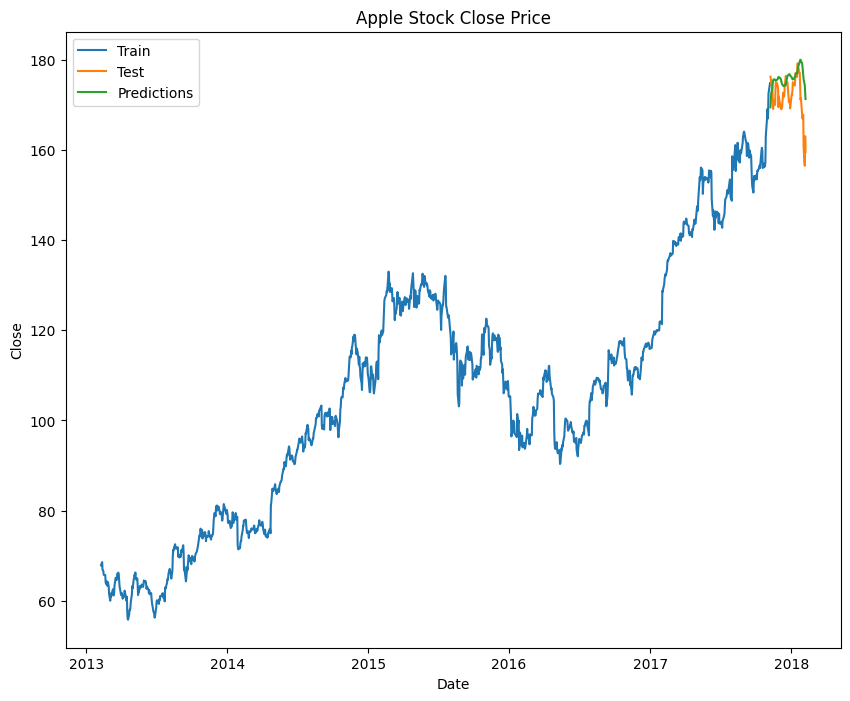

In [ ]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])